# after_scale
在变量映射到比例后评估映射。

这给用户一个机会来改变比例的最后单位变量的值，例如rgb十六进制颜色。

In [1]:
import pandas as pd

from plotnine import ggplot, aes, after_stat, after_scale, geom_bar, theme_classic, stage



`geom_bar`中的条具有两种控制着色的美学。为边界/边缘填充内部和颜色。使用`after_scale`，我们可以创建这两个的匹配组合。

从映射到颜色开始。

-    PANEL  count  group      prop  width  x  color  y
0      1      1     -1  0.066667    0.9  1      1  1
1      1      2     -1  0.133333    0.9  2      2  2
2      1      3     -1  0.200000    0.9  3      3  3
3      1      4     -1  0.266667    0.9  4      4  4
4      1      5     -1  0.333333    0.9  5      5  5


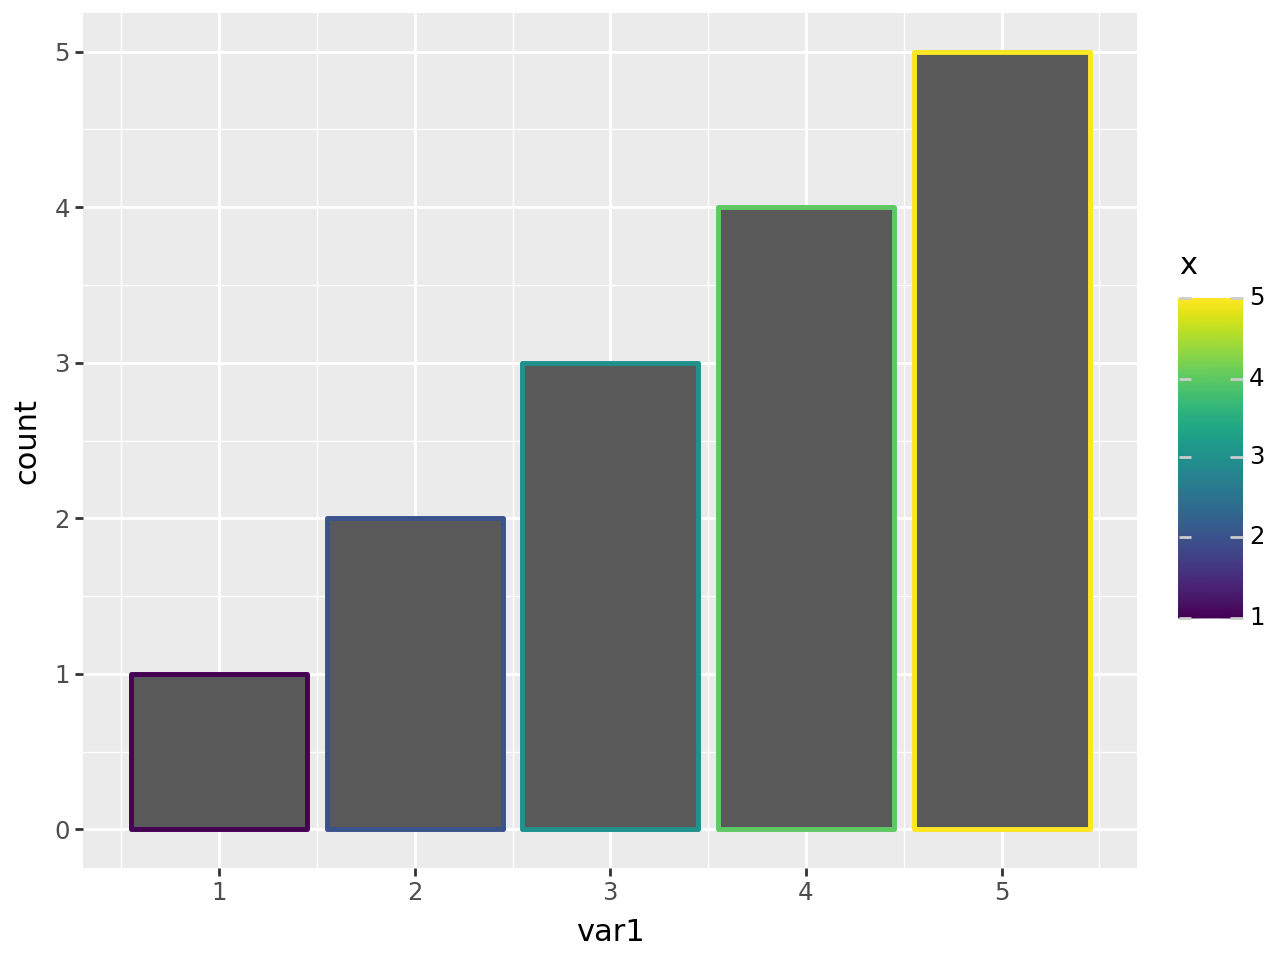

In [2]:
df = pd.DataFrame({"var1": [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]})

(
    ggplot(df, aes("var1", color=after_stat("x")))
    + geom_bar(size=1)
)

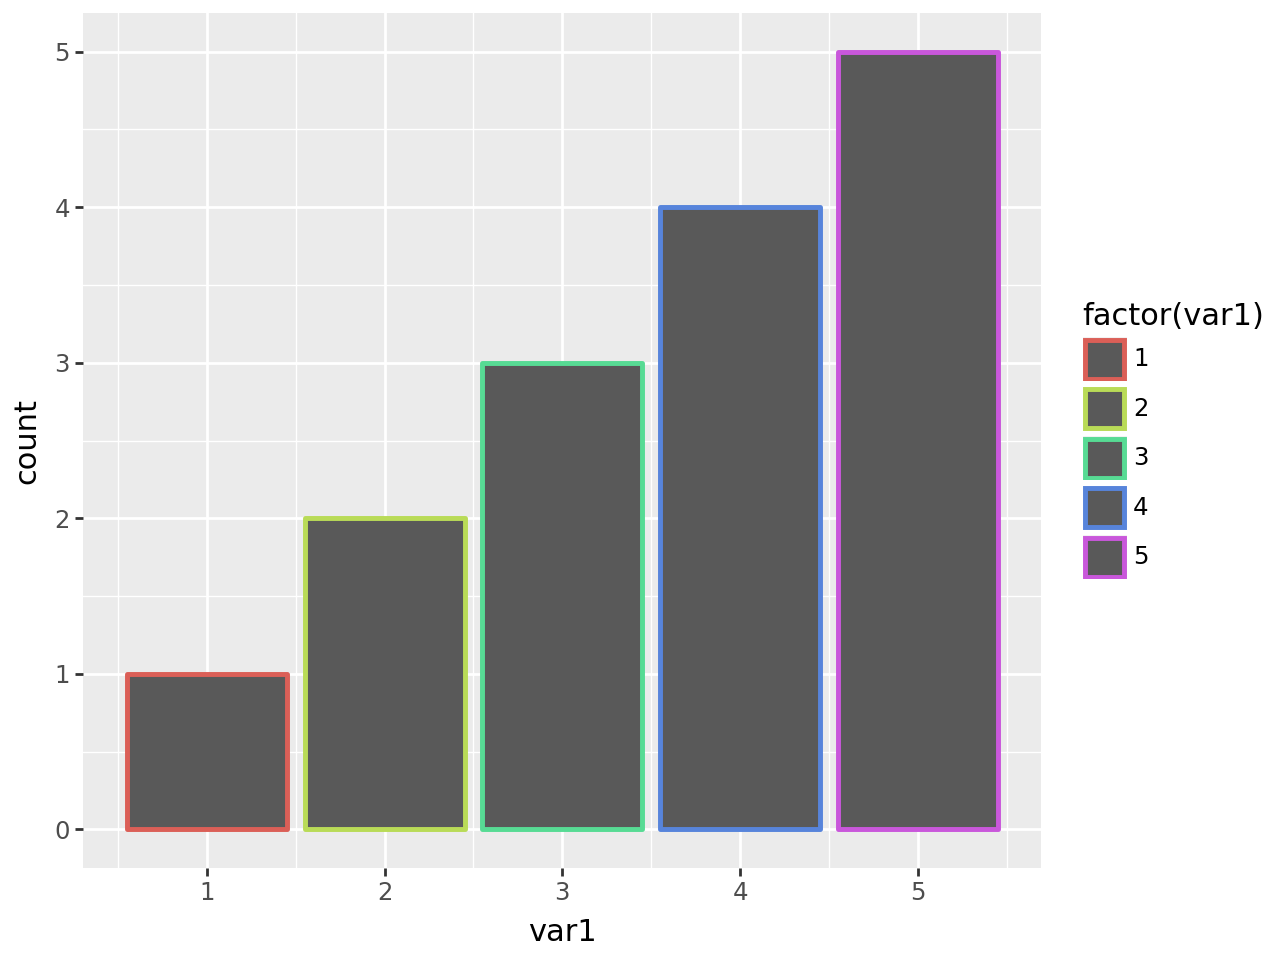

In [30]:
(
    ggplot(df, aes("var1"))
    + geom_bar(aes(color="factor(var1)"), size=1)
)

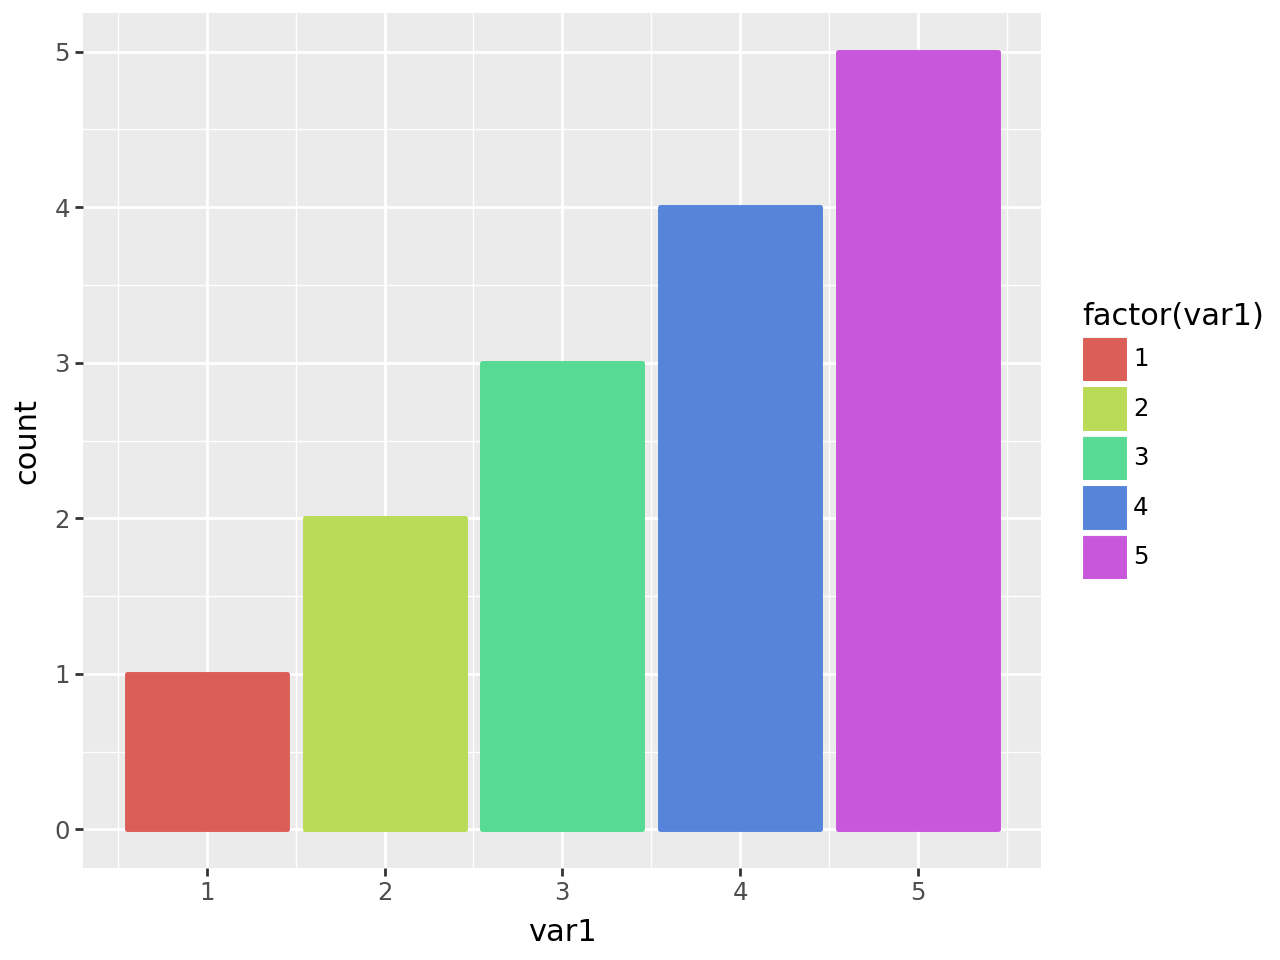

In [26]:
(
    ggplot(df, aes("var1", color="factor(var1)"))
    + geom_bar(aes(fill="factor(var1)"), size=1)
)

由于`after_scale`采用了表达式，为了美观，我们可以通过向其添加 `alpha` 通道来`fill`修改。`color'#AABBCC''#AABBCC66'`

In [31]:
after_scale('color + "66"')

after_scale('color + "66"')

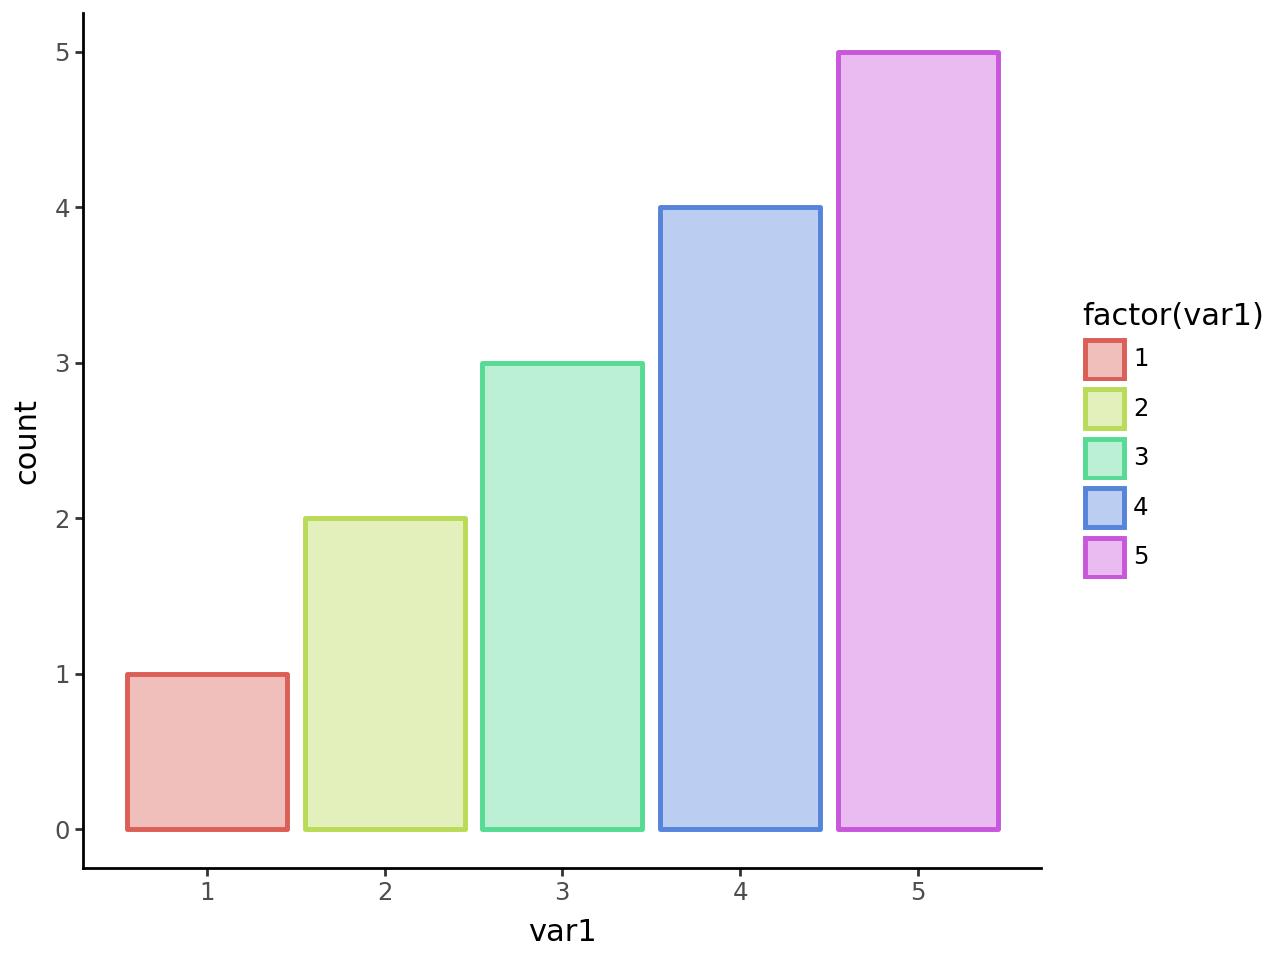

In [32]:
(
    ggplot(df, aes("var1", color="factor(var1)"))
    + geom_bar(aes(fill=after_scale('color + "66"')), size=1)
    + theme_classic()
)

我们依赖于这样一个事实：你可以将字符串附加到 pandas 系列的所有元素上

`pd.Series(['#AABBCC', '#112233']) + '66' == pd.Series(['#AABBCC66', '#11223366'])`
具有合适的主题。



-    PANEL color  count  group  prop  width  x  ymax  ymin  y
0      1     1      1      1   1.0    0.9  1    10    -1  1
1      1     2      2      2   1.0    0.9  2    10    -1  2
2      1     3      3      3   1.0    0.9  3    10    -1  3
3      1     4      4      4   1.0    0.9  4    10    -1  4
4      1     5      5      5   1.0    0.9  5    10    -1  5


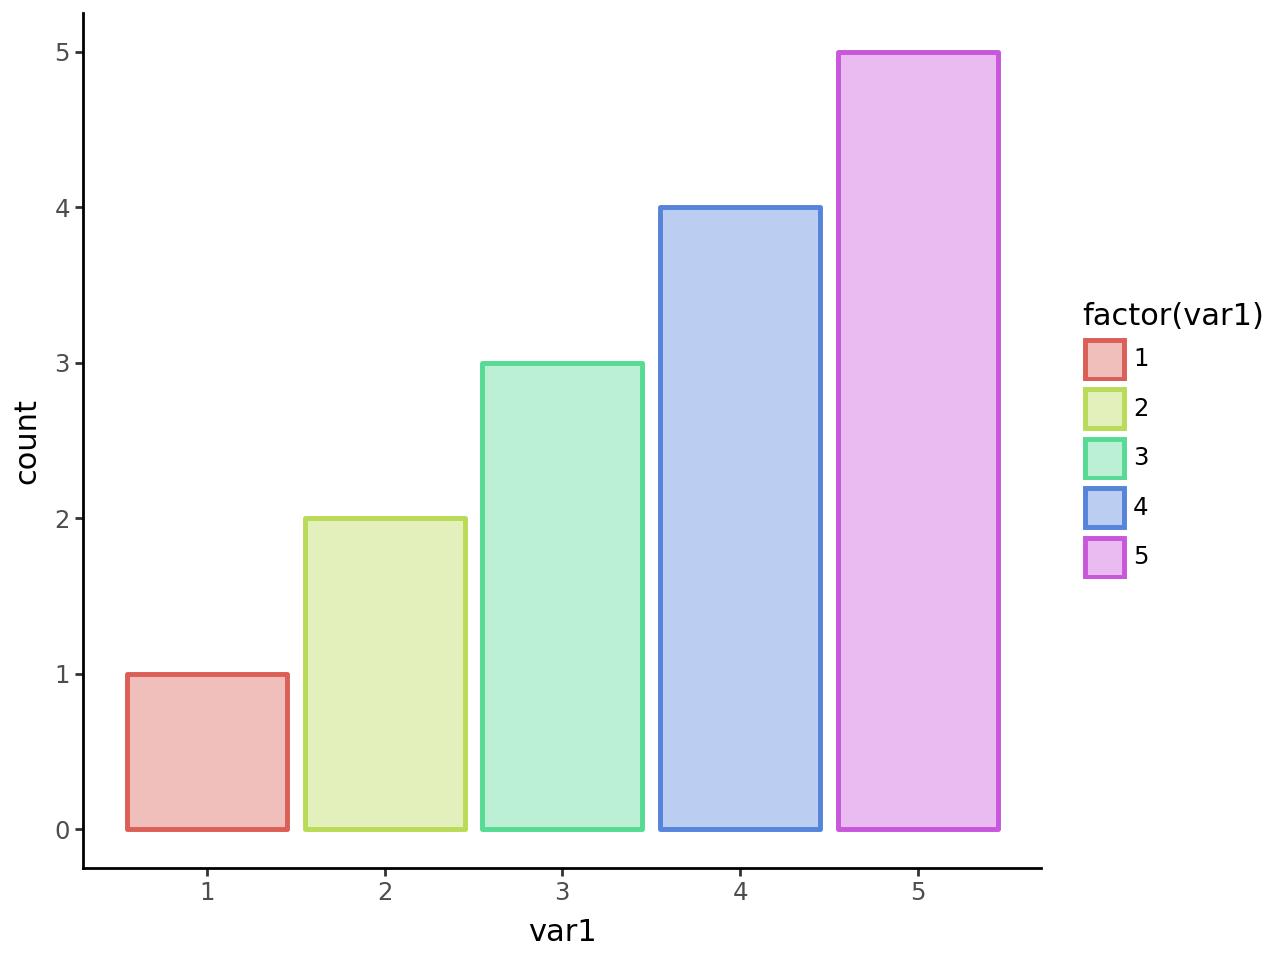

In [8]:
(
    ggplot(df, aes("var1", color="factor(var1)"))
    + geom_bar(aes(fill=after_scale('color + "66"')), size=1)
    + theme_classic()
)

In [36]:
aes(fill=after_scale('color + "66"'))

{'fill': after_scale('color + "66"')}